### Importing all Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
import warnings   #to ignore any warning message in the code
warnings.filterwarnings('ignore')

### Reading the dataset

In [3]:
df=pd.read_csv('Mall_Customers.csv')

### Exploring the dataset

In [4]:
df.head() #printing first five rows of the dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.tail() #printing last five rows of the dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
df.columns #checking all column names

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
df.rename(columns={'Genre':'Gender'},inplace=True) #renaming 'Genre' as 'Gender' for ease of work

In [8]:
df.columns #checking all column names after renaming

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [9]:
print('The datset contains:',df.shape[0],'rows and',df.shape[1],'columns') # Checking the dimension of the data set

The datset contains: 200 rows and 5 columns


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


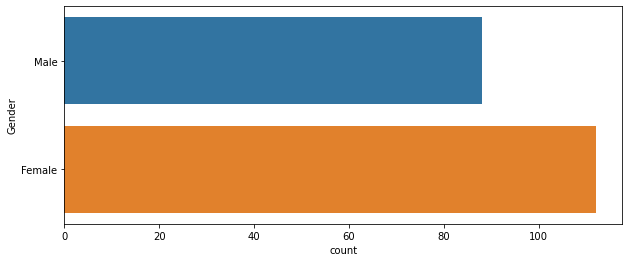

In [12]:
plt.figure(figsize=(10,4))
sns.countplot(y='Gender',data=df)
plt.show()

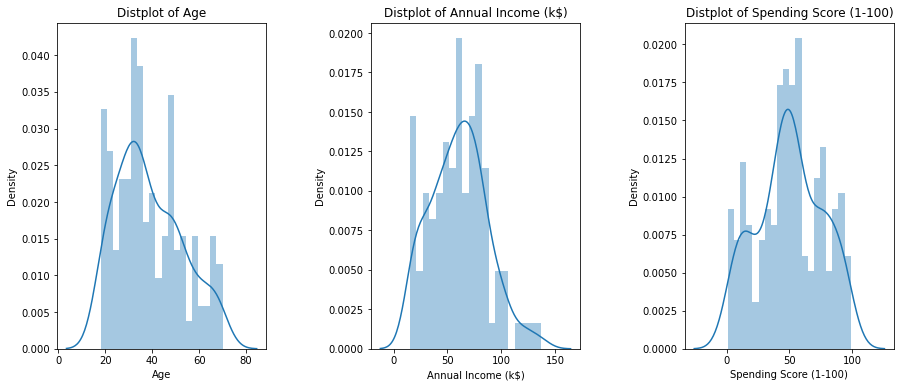

In [13]:
plt.figure(1,figsize=(15,6))
n=0
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(df[x], bins=20)
    plt.title('Distplot of {}'.format(x))
plt.show()

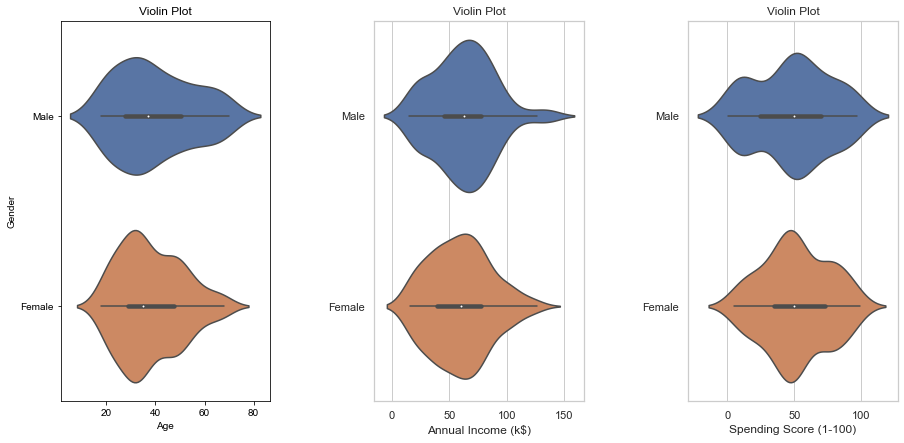

In [14]:
plt.figure(1,figsize=(15,7))
n=0
for col in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    sns.set(style='whitegrid')
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.violinplot(x=col,y='Gender', data=df)
    plt.ylabel('Gender' if n==1 else '')
    plt.title('Violin Plot')
plt.show()

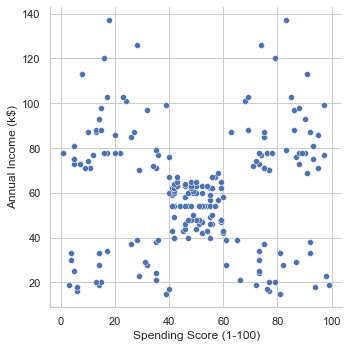

In [15]:
sns.relplot(x='Spending Score (1-100)', y='Annual Income (k$)', data=df)   

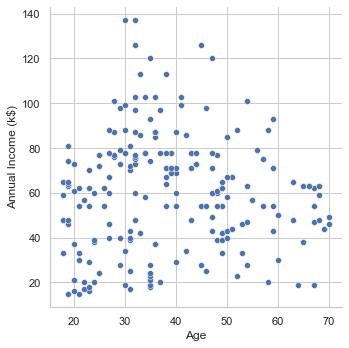

In [16]:
sns.relplot(x='Age', y='Annual Income (k$)', data=df)

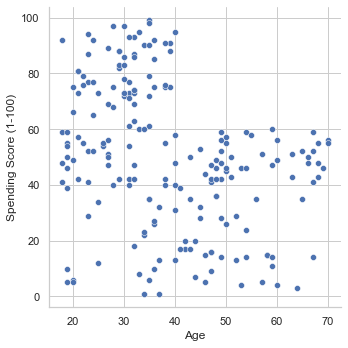

In [17]:
sns.relplot(x='Age', y='Spending Score (1-100)', data=df)

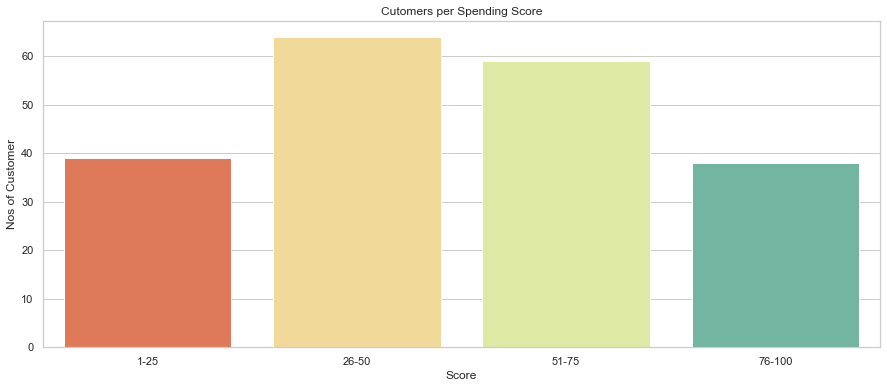

In [18]:
sp_sc_1_25=df['Spending Score (1-100)'][(df["Spending Score (1-100)"] >=1) & (df["Spending Score (1-100)"] <=25)]
sp_sc_26_50=df['Spending Score (1-100)'][(df["Spending Score (1-100)"] >=26) & (df["Spending Score (1-100)"] <=50)]
sp_sc_51_75=df['Spending Score (1-100)'][(df["Spending Score (1-100)"] >=51) & (df["Spending Score (1-100)"] <=75)]
sp_sc_76_100=df['Spending Score (1-100)'][(df["Spending Score (1-100)"] >=76) & (df["Spending Score (1-100)"] <=100)]

spx=['1-25','26-50','51-75','76-100']
spy=[len(sp_sc_1_25.values),len(sp_sc_26_50.values),len(sp_sc_51_75.values),len(sp_sc_76_100.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=spx,y=spy,palette='Spectral')
plt.title("Cutomers per Spending Score")
plt.xlabel("Score")
plt.ylabel("Nos of Customer")
plt.show()

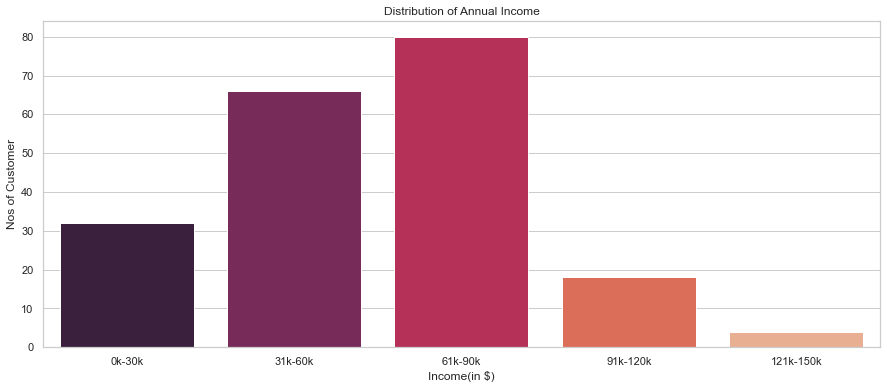

In [19]:
ic_0_30=df['Annual Income (k$)'][(df["Annual Income (k$)"] >=1) & (df["Annual Income (k$)"] <=30)]
ic_31_60=df['Annual Income (k$)'][(df["Annual Income (k$)"] >=31) & (df["Annual Income (k$)"] <=60)]
ic_61_90=df['Annual Income (k$)'][(df["Annual Income (k$)"] >=61) & (df["Annual Income (k$)"] <=90)]
ic_91_120=df['Annual Income (k$)'][(df["Annual Income (k$)"] >=91) & (df["Annual Income (k$)"] <=120)]
ic_121_150=df['Annual Income (k$)'][(df["Annual Income (k$)"] >=121) & (df["Annual Income (k$)"] <=150)]

icx=['0k-30k','31k-60k','61k-90k','91k-120k','121k-150k']
icy=[len(ic_0_30.values),len(ic_31_60.values),len(ic_61_90.values),len(ic_91_120.values),len(ic_121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=icx,y=icy,palette='rocket')
plt.title("Distribution of Annual Income")
plt.xlabel("Income(in $)")
plt.ylabel("Nos of Customer")
plt.show()

## K-Means Clustering

### Clustering based on Age and Spending Score(1-100)

In [80]:
X1 = df.loc[:,['Age','Spending Score (1-100)']].values
X1

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [35, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [52, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 61],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [48, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 55],
       [27, 47],
       [29, 42],
       [31, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [27, 51

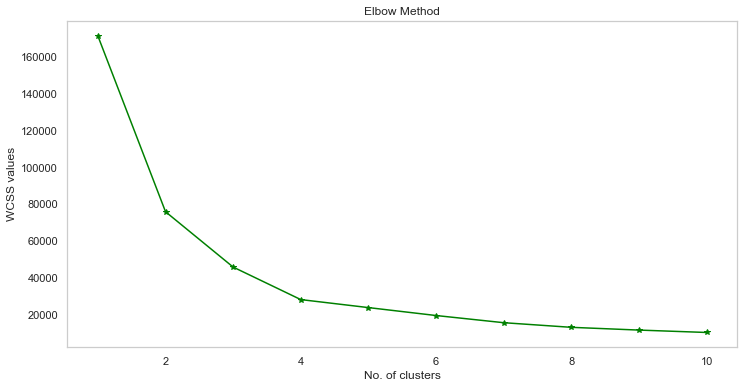

In [81]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,color='green',marker='*')
plt.title('Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel("WCSS values")
plt.show()

In [82]:
kmeansmodel = KMeans(n_clusters=4)
y_kmeans=kmeansmodel.fit_predict(X1)
print(y_kmeans)

[3 0 2 0 3 0 2 0 2 0 2 0 2 0 2 0 3 3 2 0 3 0 2 0 2 0 2 3 2 0 2 0 2 0 2 0 2
 0 2 0 1 0 1 3 2 3 1 3 3 3 1 3 3 1 1 1 1 1 3 1 1 3 1 1 1 3 1 1 3 3 1 1 1 1
 1 3 1 3 3 1 1 3 1 1 3 1 1 3 3 1 1 3 1 3 3 3 1 3 1 3 3 1 1 3 1 3 1 1 1 1 1
 3 3 3 3 3 1 1 1 1 3 3 3 0 3 0 1 0 2 0 2 0 3 0 2 0 2 0 2 0 2 0 3 0 2 0 1 0
 2 0 2 0 2 0 2 0 2 0 2 0 1 0 2 0 2 0 2 0 2 3 2 0 2 0 2 0 2 0 2 0 2 0 2 0 3
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


In [83]:
print(kmeansmodel.cluster_centers_)

[[30.1754386  82.35087719]
 [55.70833333 48.22916667]
 [43.29166667 15.02083333]
 [27.61702128 49.14893617]]


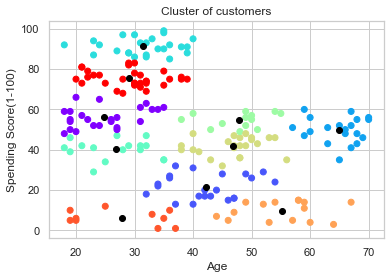

In [75]:
plt.scatter(X1[:,0],X1[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] , kmeans.cluster_centers_[:,1] , color='black')
plt.title('Cluster of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score(1-100)')
plt.show()

### Clustering based on Annual Income and Spending Score(1-100)

In [25]:
X2 = df.loc[:,['Annual Income (k$)','Spending Score (1-100)']].values

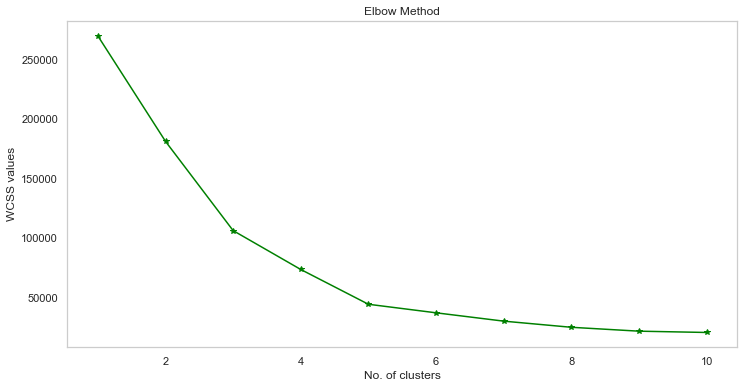

In [26]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,color='green',marker='*')
plt.title('Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel("WCSS values")
plt.show()

In [27]:
kmeansmodel = KMeans(n_clusters=5)
y_kmeans=kmeansmodel.fit_predict(X2)
print(y_kmeans)

[1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 0 1 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 4 2 0 2 4 2 4 2 0 2 4 2 4 2 4 2 4 2 0 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


In [28]:
print(kmeansmodel.cluster_centers_)

[[55.2962963  49.51851852]
 [26.30434783 20.91304348]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]]


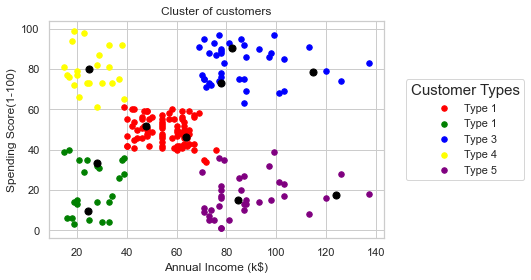

In [29]:
plt.scatter(X2[y_kmeans == 0,0], X2[y_kmeans == 0,1], s=30, c="red" , label='Type 1')
plt.scatter(X2[y_kmeans == 1,0], X2[y_kmeans == 1,1], s=30, c="green" , label='Type 1')
plt.scatter(X2[y_kmeans == 2,0], X2[y_kmeans == 2,1], s=30, c="blue" , label='Type 3')
plt.scatter(X2[y_kmeans == 3,0], X2[y_kmeans == 3,1], s=30, c="yellow" , label='Type 4')
plt.scatter(X2[y_kmeans == 4,0], X2[y_kmeans == 4,1], s=30, c="purple" , label='Type 5')
plt.scatter(kmeans.cluster_centers_[:,0] , kmeans.cluster_centers_[:,1] , s=50 , color='black')
plt.title('Cluster of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend(title='Customer Types',title_fontsize=15,loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.show()

### Clustering based on Age, Annual Income & Spending Score(1-100)

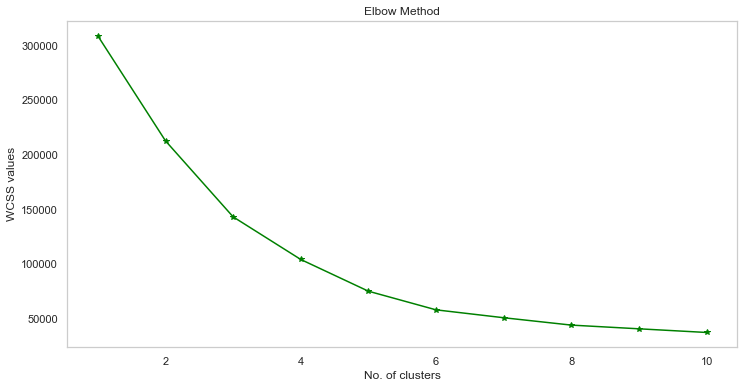

In [30]:
X3=df.iloc[:,2:]
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,color='green',marker='*')
plt.title('Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel("WCSS values")
plt.show()

In [85]:
kmeansmodel = KMeans(n_clusters=5)
y_kmeans=kmeansmodel.fit_predict(X3)
print(y_kmeans)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 3 0 1 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 1 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0]


In [86]:
print(kmeansmodel.cluster_centers_)

[[32.69230769 86.53846154 82.12820513]
 [43.72727273 55.48051948 49.32467532]
 [24.96       28.04       77.        ]
 [40.66666667 87.75       17.58333333]
 [45.2173913  26.30434783 20.91304348]]


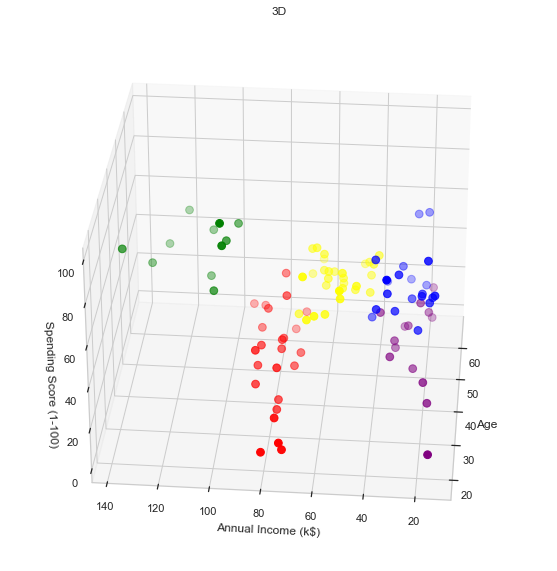

In [87]:
clusters=kmeans.fit_predict(X3)
df["label"]= clusters

from mpl_toolkits.mplot3d import Axes3D

fig= plt.figure(figsize=(20,10))
ax= fig.add_subplot(111,projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label==0], df["Spending Score (1-100)"][df.label==0],c='red',s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label==1], df["Spending Score (1-100)"][df.label==1],c='blue',s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label==2], df["Spending Score (1-100)"][df.label==2],c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label==3], df["Spending Score (1-100)"][df.label==3],c='yellow', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label==4], df["Spending Score (1-100)"][df.label==4],c='purple', s=60)
ax.view_init(30,185)

plt.title('3D')
plt.xlabel('Age')
plt.ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")
plt.show()